
# 자동차 구매 가격 예측



# PROBLEM STATEMENT

- 다음과 같은 컬럼을 가지고 있는 데이터셋을 읽어서, 어떠한 고객이 있을때, 그 고객이 얼마정도의 차를 구매할 수 있을지를 예측한다.
- 그 사람에게 맞는 자동차를 보여주려 한다.
```
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary (연봉)
- Credit Card Debt (신용카드 부채)
- Net Worth (순자산)

예측하고자 하는 값 :
- Car Purchase Amount
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 코랩 셋팅
- csv 파일을 읽기 위해, 구글 드라이브 마운트
- working directory 를, 현재의 파일이 속한 폴더로 셋팅하시오.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# import os
# os.chdir('/content/drive/MyDrive/data')

# STEP #1: IMPORT DATASET

### Car_Purchasing_Data.csv 파일을 사용한다.  코랩의 경우 구글드라이브의 전체경로를 복사하여 파일 읽는다.

### 인코딩은 다음처럼 한다. encoding='ISO-8859-1'

In [3]:
# 데이터 로딩
df = pd.read_csv('./datas_dnn/Car_Purchasing_Data.csv', encoding='ISO-8859-1')

### 컬럼을 확인하고

### 기본 통계 데이터를 확인해 보자

In [4]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### 연봉이 가장 높은 사람은 누구인가

In [5]:
df.shape

(500, 9)

In [6]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [7]:
df.loc[  df['Annual Salary'] == df['Annual Salary'].max() , ]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
28,Gemma Hendrix,lobortis@non.co.uk,Denmark,1,46.124036,100000.0,17452.92179,188032.0778,58350.31809


### 나이가 가장 어린 고객은, 연봉이 얼마인가

In [8]:
df.sort_values(by='Age', ascending=True).head(1)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
444,Camden,Aliquam.adipiscing.lobortis@loremut.net,Congo (Brazzaville),1,20.0,70467.29492,100.0,494606.6334,28645.39425


# STEP #2: VISUALIZE DATASET

### 상관관계를 분석하기 위해, pairplot 을 그려보자.

In [9]:
import seaborn as sb

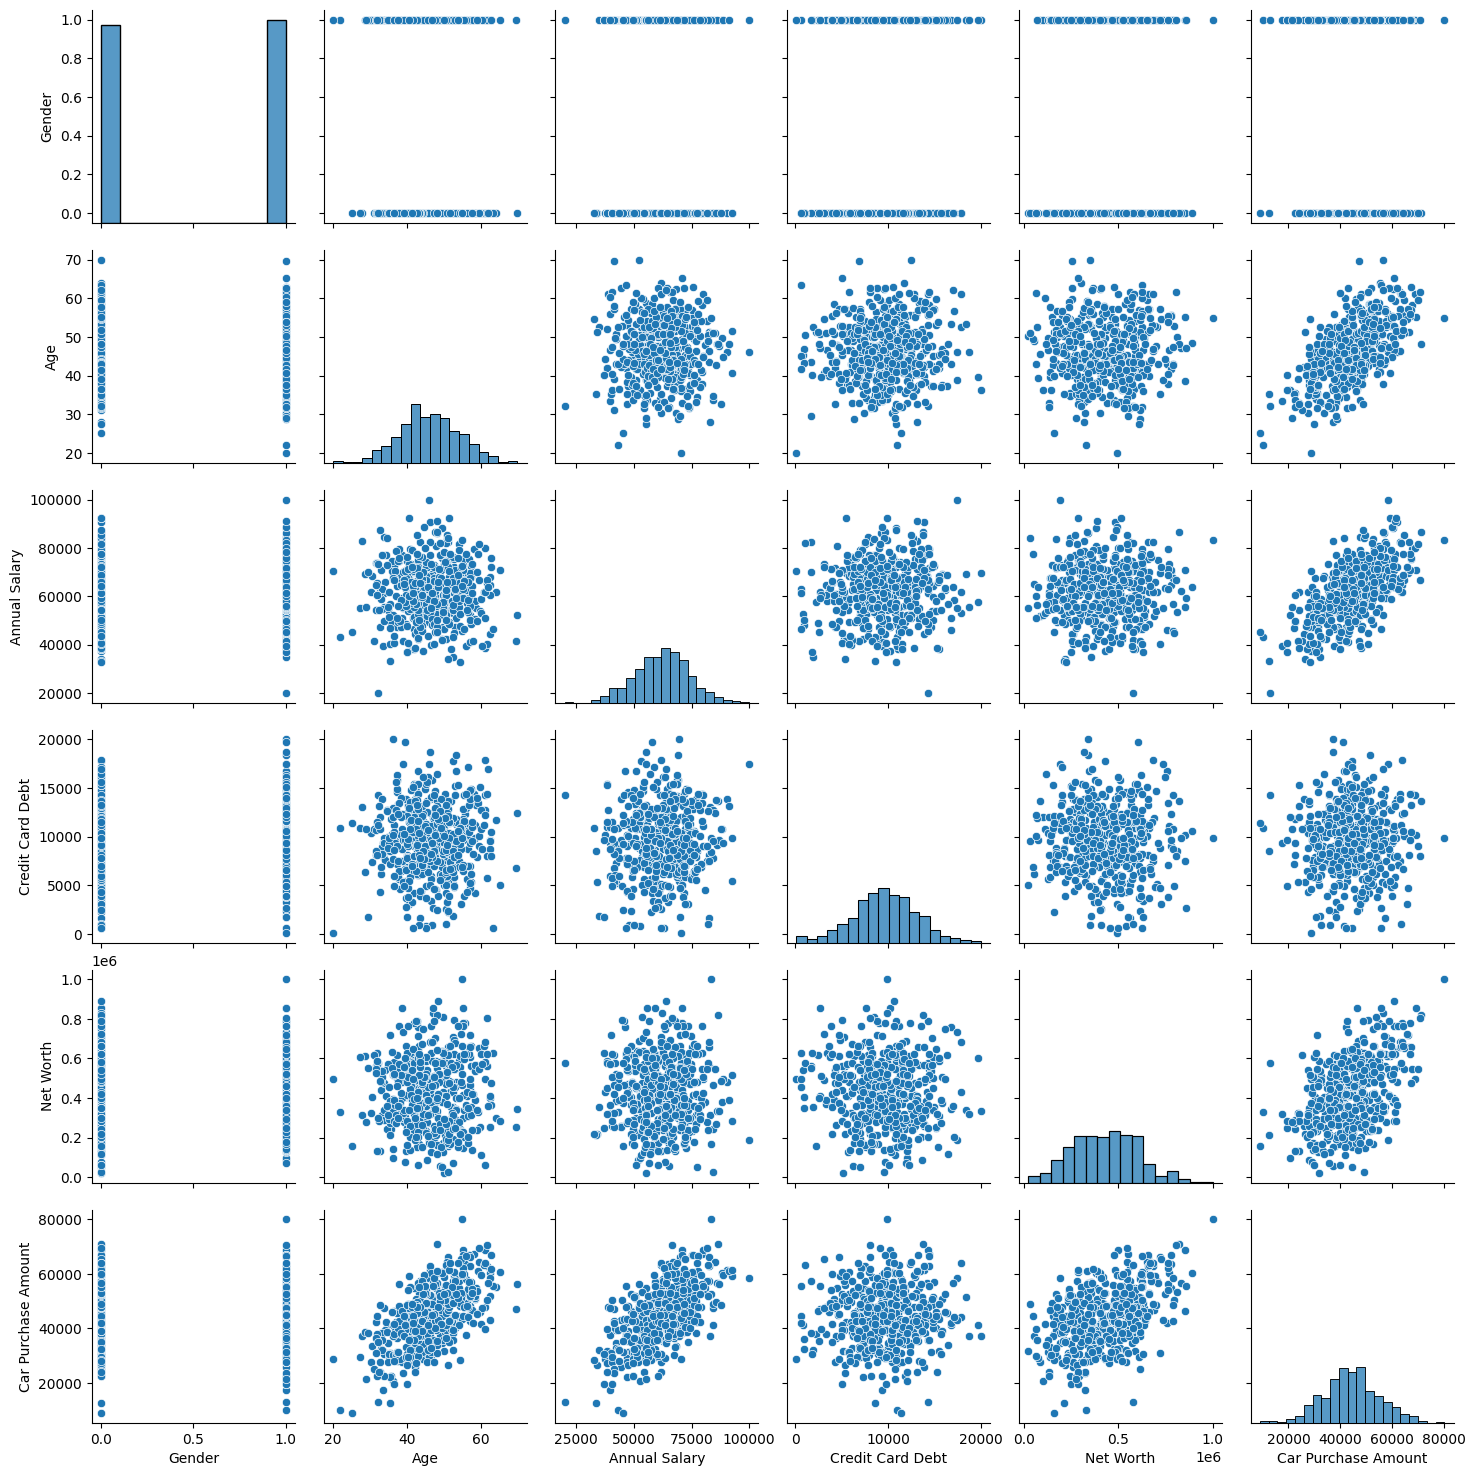

In [10]:
sb.pairplot(data= df)
plt.show()

In [11]:
df_corr = df.corr(numeric_only= True)

In [12]:
df_corr

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
Annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


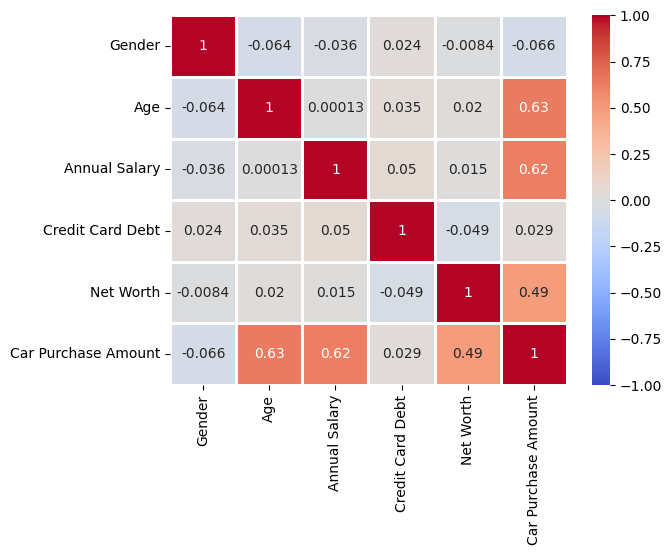

In [13]:
sb.heatmap(data=df_corr, annot=True, linewidths=0.8, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

# STEP #3: 데이터 클린징 및 X, y 데이터로 분할




### NaN 값이 있으면, 이를 해결하시오.

In [14]:
df.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [15]:
df.head(2)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566


In [16]:
df['Country'].nunique()

211

In [17]:
( df['Country'].value_counts() == 6 ).sum()

np.int64(3)

### 학습을 위해 'Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount' 컬럼을 제외한 컬럼만, X로 만드시오.

In [18]:
X = df.loc[ : , 'Gender' : 'Net Worth'  ]

In [19]:
X.head(2)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078


### y 값은 'Car Purchase Amount' 컬럼으로 셋팅하시오.

In [20]:
y = df['Car Purchase Amount']

In [21]:
y.head(3)

0    35321.45877
1    45115.52566
2    42925.70921
Name: Car Purchase Amount, dtype: float64

### 피처 스케일링
- X, y 모두 스케일링함.
- 정규화(normalization) - MinMaxScaler

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
sc_X = MinMaxScaler()

In [24]:
X.head(3)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773


In [25]:
X_scaled = sc_X.fit_transform(X)

In [26]:
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]],
      shape=(500, 5))

In [27]:
sc_y = MinMaxScaler()

In [28]:
y[:5]

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: Car Purchase Amount, dtype: float64

In [29]:
y.shape

(500,)

### DNN 학습을 위해서, y 의 shape 2차원, scale하기

In [30]:
y.values.reshape(500, 1)[:5]

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248]])

In [31]:
y_scaled = sc_y.fit_transform( y.values.reshape(-1, 1) )

In [32]:
y_scaled[:5]

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116]])

# STEP#4: 학습/테스트 데이터셋으로 분할

### 트레이닝셋과 테스트셋으로 분리하시오.
- 테스트 사이즈는 25%로 하며, 동일 결과를 위해 랜덤스테이트는 50 으로 셋팅하시오.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=88)

### 아래 라이브러리를 임포트 하시오

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.optimizers import Adam

In [36]:
X_train.shape

(400, 5)

## DNN 모델 설계

In [67]:
# X_scaled.shape
input_dim = X_scaled.shape[1]  # 컬럼의 갯수

In [68]:
from keras import Input

# 네트워크 설계
model = Sequential()
model.add(Input(shape=(input_dim,)))  # 입력데이터(X의 컬럼 갯수)
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.summary()
# 학습 방식 계획
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = 'mse',
    metrics = ['mse']
)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 25)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# 모델 설계와 학습 방법 함수로 정의하기
def build_model(input_dim):
    # 네트워크 설계
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # 입력데이터(X의 컬럼 갯수)
    model.add(Dense(units=5, activation='relu'))
    model.add(Dense(units=25, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.summary()
    # 학습 방식 계획
    model.compile(
        optimizer = Adam(learning_rate=0.001),
        loss = 'mse',
        metrics = ['mse']
    )

    # 리턴값
    return model

# 학습하기

### 딥러닝을 이용한 모델링을 하시오.
- 옵티마이저는 'adam' 으로 하고, loss function은 'mean_squared_error' 로 셋팅하여 컴파일 하시오

In [72]:
# # 독립변수 5개
# model.fit(
#     X_train, y_train, 
#     epochs=40, 
#     batch_size=10,
#     verbose='auto'
# )
model_rt = build_model(input_dim)
model_rt.fit(
        X_train, y_train, 
        epochs=40, 
        batch_size=10,
        verbose='auto'
)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 25)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - loss: 0.0506 - mse: 0.0506 
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.0145 - mse: 0.0145
Epoch 3/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.0110 - mse: 0.0110
Epoch 4/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.0084 - mse: 0.0084
Epoch 5/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.0073 - mse: 0.0073
Epoch 6/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.0065 - mse: 0.0065
Epoch 7/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.0059 - mse: 0.0059
Epoch 8/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.0051 - mse: 0.0051
Epoch 9/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.0045 - mse: 0.0045
Epoch 10/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.0041 - mse: 0.0041
Epoch 11/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.0039 - mse: 0.0039       
Epoch 12/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.0033 - mse: 0.0033
Epoch 13/40
40/40

# STEP#5: EVALUATING THE MODEL

### MSE 확인

In [48]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9798e-05 - mse: 2.9798e-05 


[2.979798045998905e-05, 2.979798045998905e-05]

### 테스트셋으로 예측을 해 보시오.

In [52]:
y_pred =model.predict(X_test)
y_pred[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[0.28585148],
       [0.54419893],
       [0.24719486],
       [0.44413397],
       [0.81596506]], dtype=float32)

In [92]:
# 스케일한 값을 원래값으로 되돌림
y_pred_2 = sc_y.inverse_transform(y_pred)
y_pred_2[:3]

array([[29295.455],
       [47638.12 ],
       [26550.836]], dtype=float32)

### 실제값과 예측값을 plot 으로 나타내시오.

In [59]:
y_test[:2]

array([[0.2911385 ],
       [0.54529522]])

In [60]:
y_pred[:2]

array([[0.28585148],
       [0.54419893]], dtype=float32)

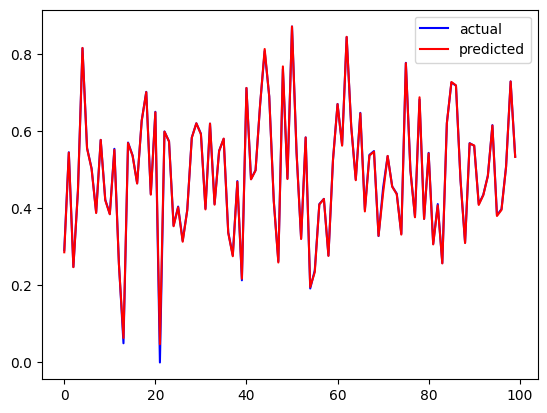

In [61]:
plt.plot(y_test, label='actual', c='b')
plt.plot(y_pred, label='predicted', c='r')
plt.legend()
plt.show()

### R² Score(결정 계수)

In [74]:
from sklearn.metrics import r2_score

# 일반화

### 새로운 고객 데이터가 있습니다. 이 사람은 차량을 얼마정도 구매 가능한지 예측하시오.

### 여자이고, 나이는 38, 연봉은 90000,  카드빚은 2000, 순자산은 500000 일때, 어느정도의 차량을 구매할 수 있을지 예측하시오.

In [102]:
X.head(2)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078


In [120]:
# 500개의 행 데이터에 컬럼이 5개
X_scaled.shape

(500, 5)

In [123]:
# 1개의 행 데이터에 컬럼이 5개
new_data = np.array([1, 38, 90000, 2000, 500000]).reshape(-1, 5)
new_data.shape

(1, 5)

### 데이터 변환

In [124]:
new_data_sc = sc_X.transform(new_data)

C:\Users\Admin\miniconda3\envs\tf_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [125]:
new_data_sc

array([[1.        , 0.36      , 0.875     , 0.09547739, 0.48979592]])

### 모델 예측

In [128]:
y_pred = model_rt.predict(new_data_sc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [129]:
y_pred

array([[0.6268202]], dtype=float32)

### 실제값은?

In [130]:
sc_y.inverse_transform(y_pred)

array([[53504.234]], dtype=float32)

## 모델 저장

In [131]:
import os
os.makedirs("models", exist_ok=True)
model.save("models/dnn_model_lr.keras")

## 모델 재사용

In [ ]:
from tensorflow.keras.models import load_model

model_ld = load_model("models/dnn_model_lr.keras")

In [ ]:
y_pred = model_ld.predict(new_data_sc)

In [ ]:
# 실제값 확인
sc_y.inverse_transform(y_pred)